In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from scipy import stats

In [2]:
try:
    df = pd.read_csv("loan_dataset_final.csv", encoding='latin1')
except UnicodeDecodeError:
    print("Failed to decode with 'latin1' encoding.")

In [3]:
df['loan_status']

0            Current
1         Fully Paid
2         Fully Paid
3         Fully Paid
4            Current
            ...     
42530    Charged Off
42531    Charged Off
42532    Charged Off
42533    Charged Off
42534    Charged Off
Name: loan_status, Length: 42535, dtype: object

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'installment', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'interest_rate',
       'revol_utilization', 'number_bc_gt_75', 'fico_score', 'lti',
       'month_since_oldest_tl', 'race_name', 'gender'],
      dtype='object')

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl
count,4.253500e+04,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,...,42535.000000,42535.000000,42390.0,41170.000000,42535.000000,42445.000000,42535.000000,42535.000000,42531.000000,42506.000000
mean,6.645799e+05,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.306357,...,100.307353,13.956737,0.0,0.045227,0.121650,0.442584,0.499988,723.065240,0.186105,107.567073
std,2.193022e+05,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,1.711415,...,718.078716,159.621861,0.0,0.208737,0.037079,0.306107,0.785378,30.241456,0.116228,58.874550
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.054200,0.000000,0.000000,619.000000,0.000789,1.000000
25%,4.983925e+05,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.096300,0.166000,0.000000,704.000000,0.097674,67.000000
50%,6.442500e+05,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.119900,0.446000,0.000000,719.000000,0.162813,98.000000
75%,8.258225e+05,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,...,0.000000,0.000000,0.0,0.000000,0.147200,0.701000,1.000000,739.000000,0.250000,134.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,...,29623.350000,7002.190000,0.0,2.000000,0.245900,1.088000,3.000000,829.000000,1.337500,685.000000


In [6]:
for column in df.columns:
    print(f"For column {column}: No of unique values = {len(df[column].unique())}")

For column id: No of unique values = 42535
For column member_id: No of unique values = 42535
For column loan_amnt: No of unique values = 898
For column funded_amnt: No of unique values = 1051
For column funded_amnt_inv: No of unique values = 9240
For column term: No of unique values = 2
For column installment: No of unique values = 16459
For column emp_title: No of unique values = 30447
For column emp_length: No of unique values = 12
For column home_ownership: No of unique values = 5
For column annual_inc: No of unique values = 5598
For column verification_status: No of unique values = 3
For column issue_d: No of unique values = 55
For column loan_status: No of unique values = 9
For column pymnt_plan: No of unique values = 2
For column desc: No of unique values = 28948
For column purpose: No of unique values = 14
For column title: No of unique values = 20964
For column addr_state: No of unique values = 50
For column dti: No of unique values = 2894
For column delinq_2yrs: No of unique v

In [7]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'NONE', 'OTHER'], dtype=object)

In [8]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
installment                       0
emp_title                      2626
emp_length                     1112
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                          13521
purpose                           0
title                            13
addr_state                        0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
mths_since_last_delinq        26926
mths_since_last_record        38884
open_acc                         29
pub_rec                          29
revol_bal                         0
total_acc                   

In [9]:
df = df.replace(['1 year', '6 years', '9 years', '< 1 year', '8 years', '10+ years', '5 years', '2 years', '3 years', '4 years', '7 years'],
                [1, 6, 9, 0, 8, 10, 5, 2, 3, 4, 7])

df.head()

C:\Users\unnat\AppData\Local\Temp\ipykernel_66740\758125989.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['1 year', '6 years', '9 years', '< 1 year', '8 years', '10+ years', '5 years', '2 years', '3 years', '4 years', '7 years'],


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,...,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,atlantic tomorrows office,1.0,RENT,...,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,The Red Threads Inc.,6.0,RENT,...,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,T-Mobile USA Inc,9.0,MORTGAGE,...,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female
3,1000045,1225655,14000,14000,14000.0,60 months,349.98,Trader Joe's,9.0,MORTGAGE,...,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,White,Female
4,1000067,1225680,15000,15000,14975.0,60 months,370.94,Truevance Engineering,0.0,RENT,...,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,White,Female


In [10]:
# List of columns to analyze
columns_of_interest = ['loan_amnt', 'annual_inc', 'fico_score', 'emp_length', 'lti',  'dti']

# Calculate statistics for each column
for column in columns_of_interest:
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode()[0]
    
    print(f"{column}:")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}")
    print(f"Maximum: {df[column].max()}")
    print(f"Minimum: {df[column].min()}\n")

loan_amnt:
Mean: 11089.72258140355
Median: 9700.0
Mode: 10000
Maximum: 35000
Minimum: 500

annual_inc:
Mean: 69136.55642025816
Median: 59000.0
Mode: 60000.0
Maximum: 6000000.0
Minimum: 1896.0

fico_score:
Mean: 723.0652403902668
Median: 719.0
Mode: 704
Maximum: 829
Minimum: 619

emp_length:
Mean: 4.923086208145233
Median: 4.0
Mode: 10.0
Maximum: 10.0
Minimum: 0.0

lti:
Mean: 0.18610491131146692
Median: 0.162813416
Mode: 0.2
Maximum: 1.3375
Minimum: 0.000789474

dti:
Mean: 13.37304314094275
Median: 13.47
Mode: 0.0
Maximum: 29.99
Minimum: 0.0



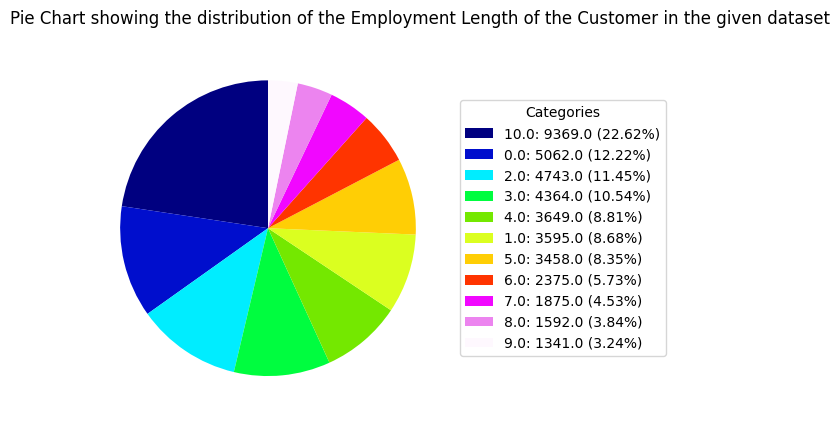

In [11]:
# Count occurrences of each category
category_counts = df['emp_length'].value_counts()

# Calculate percentages
category_percentages = category_counts / category_counts.sum() * 100

# Create a combined DataFrame for plotting
plot_data = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_percentages
})

# Define a custom color scheme
colors = plt.cm.gist_ncar(np.linspace(0, 1, len(plot_data)))

# Plot the pie chart
fig, ax = plt.subplots()

wedges, texts = ax.pie(plot_data['Count'], colors=colors, startangle=90, textprops=dict(color="w"))

# Create a legend with count and percentage
legend_labels = [
    f"{category}: {row['Count']} ({row['Percentage']:.2f}%)" 
    for category, row in plot_data.iterrows()
]
ax.legend(
    wedges, 
    legend_labels, 
    title="Categories",
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)
)

fig.suptitle("Pie Chart showing the distribution of the Employment Length of the Customer in the given dataset", y=0.95, x=0.75)
plt.show()

In [12]:
df = df.replace(['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off', 'In Grace Period', 
                 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off', 'Default'],
                 [2, 0, 1, 8, 3, 5, 4, 6, 7])

C:\Users\unnat\AppData\Local\Temp\ipykernel_66740\3456379862.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off', 'In Grace Period',


In [13]:
# assuming that those who did not specify their working duration, have been working for less than a year
df['emp_length'] = df['emp_length'].fillna(0)

In [14]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].mean())

df['Division'] = df['loan_amnt'] / df['annual_inc']
df['lti'] = df['lti'].fillna(df['Division'])


df = df.drop(columns=['Division'])

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].max()*5)
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(df['mths_since_last_record'].max()*5)
df['month_since_oldest_tl'] = df['month_since_oldest_tl'].fillna(df['month_since_oldest_tl'].max()*5)

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)
df['open_acc'] = df['open_acc'].fillna(0)
df['pub_rec'] = df['pub_rec'].fillna(0)
df['total_acc'] = df['total_acc'].fillna(0)
# df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['revol_utilization'] = df['revol_utilization'].fillna(0)

In [15]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
installment                       0
emp_title                      2626
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                          13521
purpose                           0
title                            13
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq            0
mths_since_last_record            0
open_acc                          0
pub_rec                           0
revol_bal                         0
total_acc                   

In [16]:
len(df['loan_status']), len(df['emp_length'])

(42535, 42535)

In [17]:
counts = df.groupby(['emp_length', 'loan_status']).size().reset_index(name='count')

counts

,emp_length,loan_status,count
0,0.0,0,4743
1,0.0,1,381
2,0.0,2,49
3,0.0,3,4
4,0.0,4,1
...,...,...,...
68,10.0,2,170
69,10.0,3,6
70,10.0,5,6
71,10.0,6,156


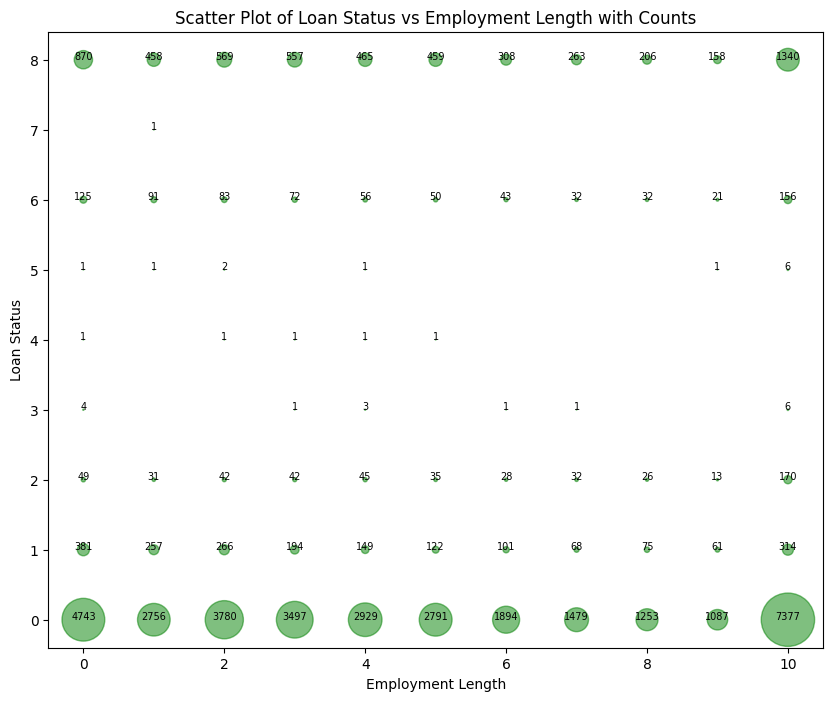

In [18]:
# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=counts['emp_length'], y=counts['loan_status'], s=counts['count']*0.2, alpha=0.5, color='green')

# Annotate each point with the count
for i in range(len(counts)):
    plt.text(counts['emp_length'][i], counts['loan_status'][i], counts['count'][i],
             fontsize=7, ha='center', color='black')

plt.xlabel('Employment Length')
plt.ylabel('Loan Status')
plt.title('Scatter Plot of Loan Status vs Employment Length with Counts')
plt.show()

In [19]:
# Group by home_ownership and loan_status, and count the occurrences
grouped = df.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)

grouped

loan_status,0,1,2,3,4,5,6,7,8
home_ownership,,,,,,,,,
MORTGAGE,15052,908,290,8,3,5,348,1,2344
NONE,3,4,0,0,0,0,1,0,0
OTHER,80,27,0,0,0,0,11,0,18
OWN,2583,138,33,2,1,0,49,0,445
RENT,15868,911,190,6,1,7,352,0,2846


<Figure size 1000x800 with 0 Axes>

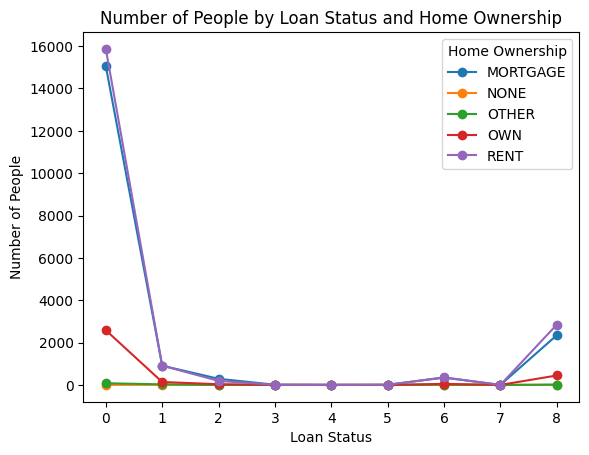

In [20]:
plt.figure(figsize=(10, 8))

# Plot the data
grouped.T.plot(kind='line', marker='o')

plt.xlabel('Loan Status')
plt.ylabel('Number of People')
plt.title('Number of People by Loan Status and Home Ownership')
plt.legend(title='Home Ownership')
plt.show()

In [21]:
# Group by home_ownership and loan_status, and count the occurrences
grouped = df.groupby(['gender', 'loan_status']).size().unstack(fill_value=0)

grouped

loan_status,0,1,2,3,4,5,6,7,8
gender,,,,,,,,,
Female,16687,999,258,8,0,6,379,1,3035
Male,16899,989,255,8,5,6,382,0,2618


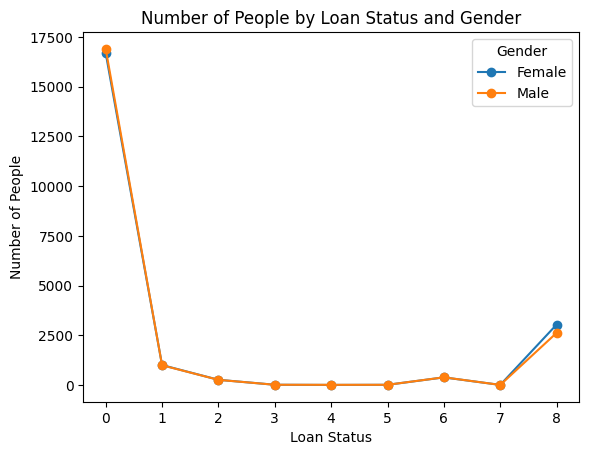

In [22]:
grouped.T.plot(kind='line', marker='o')

plt.xlabel('Loan Status')
plt.ylabel('Number of People')
plt.title('Number of People by Loan Status and Gender')
plt.legend(title='Gender')
plt.show()

In [23]:
res = dict(zip([2, 0, 1, 8, 3, 5, 4, 6, 7],
               ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off', 'In Grace Period', 
                 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off', 'Default']))

myKeys = list(res.keys())
myKeys.sort()
sorted_dict = {i: res[i] for i in myKeys}

sorted_dict

{0: 'Fully Paid',
 1: 'Does not meet the credit policy. Status:Fully Paid',
 2: 'Current',
 3: 'In Grace Period',
 4: 'Late (16-30 days)',
 5: 'Late (31-120 days)',
 6: 'Does not meet the credit policy. Status:Charged Off',
 7: 'Default',
 8: 'Charged Off'}

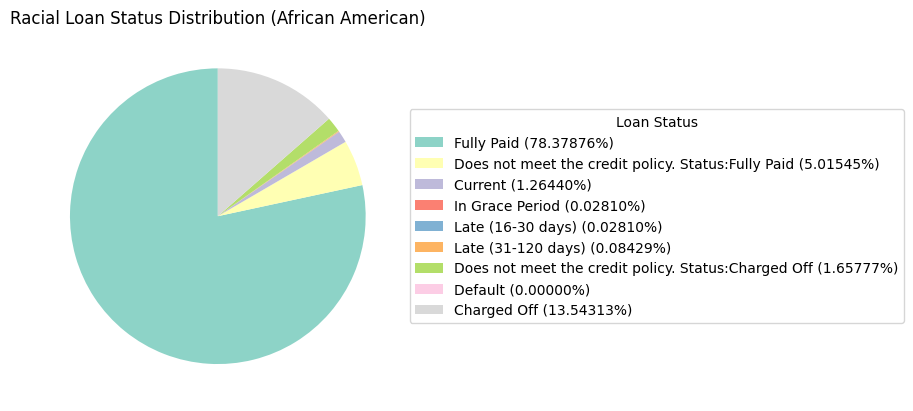

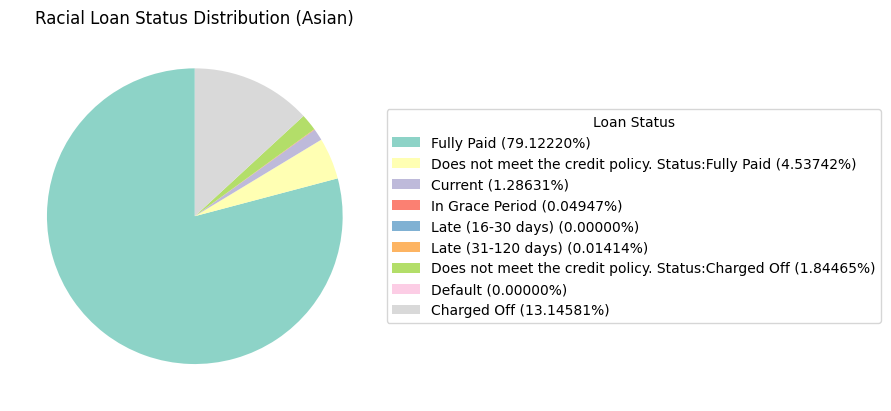

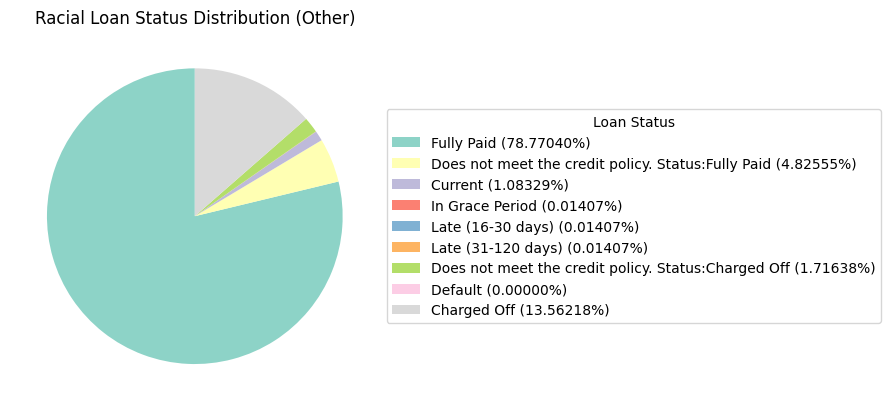

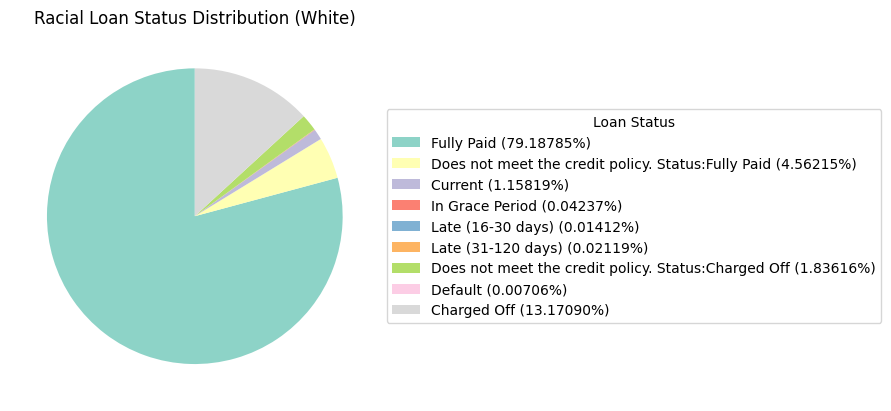

In [24]:
# Group data by Gender and Loan_Status
race_status_counts = df.groupby(['race_name', 'loan_status']).size().unstack(fill_value=0)

def create_pie_chart(race, data, colormap='Set3'):
    plt.figure()

    # colors = plt.cm.set3(range(len(data)))
    
    wedges, _ = plt.pie(data, labels=None, startangle=90, colors=matplotlib.colormaps.get_cmap(colormap)(range(len(data))))
    plt.title(f"Racial Loan Status Distribution ({race})")
    
    # Calculate percentages
    total = data.sum()
    percentages = [f"{(value / total) * 100:.5f}%" for value in data]
    
    # Create legend labels with categories and their percentages
    legend_labels = [f"{sorted_dict[i]} ({percentage})" for i, percentage in zip(data.index, percentages)]
    
    # Add legend outside of the pie chart
    plt.legend(wedges, legend_labels, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

# Create pie charts for each gender
for gender, data in race_status_counts.iterrows():
    create_pie_chart(gender, data)

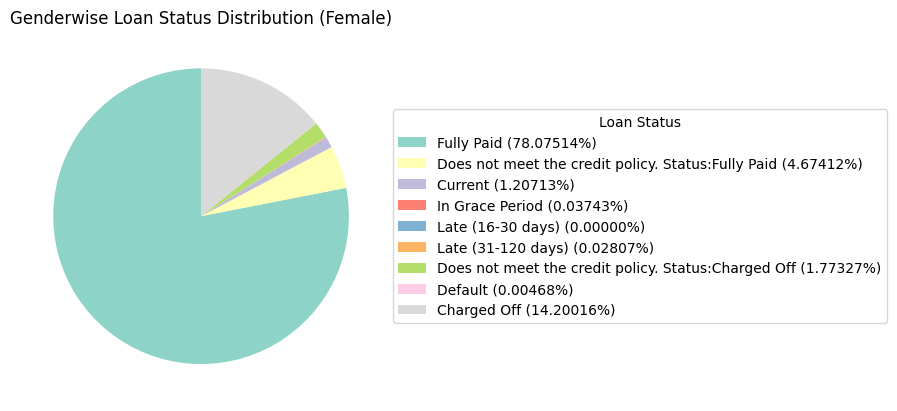

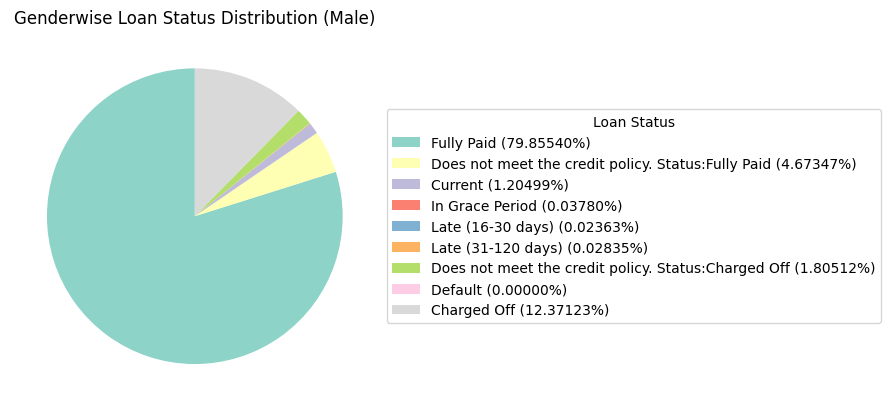

In [25]:
# Group data by Gender and Loan_Status
gender_status_counts = df.groupby(['gender', 'loan_status']).size().unstack(fill_value=0)

def create_pie_chart(gender, data, colormap='Set3'):
    plt.figure()

    # colors = plt.cm.set3(range(len(data)))
    
    wedges, _ = plt.pie(data, labels=None, startangle=90, colors=matplotlib.colormaps.get_cmap(colormap)(range(len(data))))
    plt.title(f"Genderwise Loan Status Distribution ({gender})")
    
    # Calculate percentages
    total = data.sum()
    percentages = [f"{(value / total) * 100:.5f}%" for value in data]
    
    # Create legend labels with categories and their percentages
    legend_labels = [f"{sorted_dict[i]} ({percentage})" for i, percentage in zip(data.index, percentages)]
    
    # Add legend outside of the pie chart
    plt.legend(wedges, legend_labels, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

# Create pie charts for each gender
for gender, data in gender_status_counts.iterrows():
    create_pie_chart(gender, data)

Seeing if gender affects other areas of the data:

In [26]:
df[df['gender'] == 'Male']['emp_length']

5        8.0
7        5.0
8        2.0
9        5.0
10       2.0
        ... 
42524    1.0
42526    6.0
42528    0.0
42529    2.0
42531    5.0
Name: emp_length, Length: 21162, dtype: float64

C:\Users\unnat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21162.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\unnat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21373.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for males: p-value = 3.1170154116994905e-81
Shapiro-Wilk Test for females: p-value = 5.049984324219547e-81


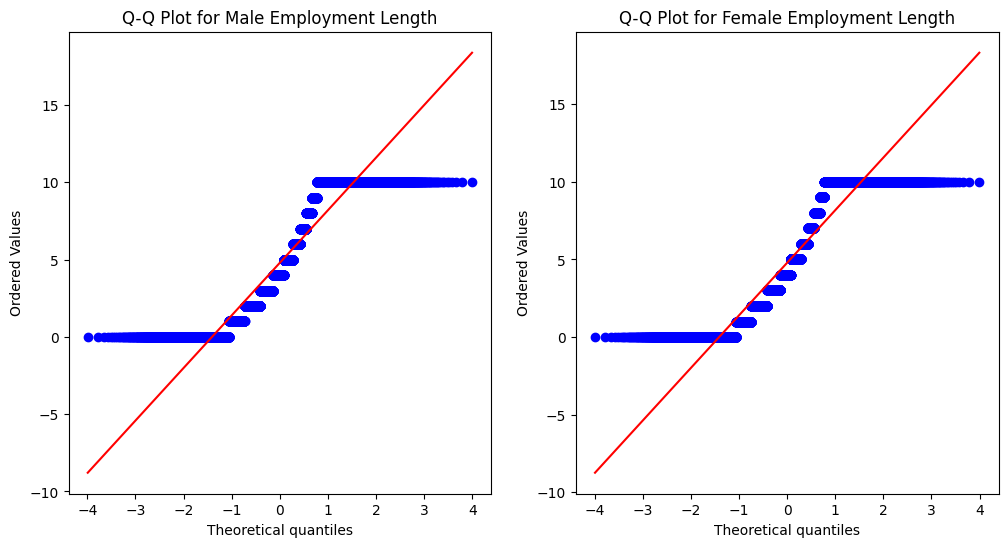

In [27]:
# Separate data by gender
male_data = df[df['gender'] == 'Male']['emp_length']
female_data = df[df['gender'] == 'Female']['emp_length']

# Shapiro-Wilk Test for normality
shapiro_male = stats.shapiro(male_data)
shapiro_female = stats.shapiro(female_data)

print(f"Shapiro-Wilk Test for males: p-value = {shapiro_male.pvalue}")
print(f"Shapiro-Wilk Test for females: p-value = {shapiro_female.pvalue}")

# Q-Q Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for male data
stats.probplot(male_data, dist="norm", plot=axs[0])
axs[0].set_title("Q-Q Plot for Male Employment Length")

# Q-Q plot for female data
stats.probplot(female_data, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot for Female Employment Length")

plt.show()

In [28]:
# Perform the Mann-Whitney U test
mannwhitney_test = stats.mannwhitneyu(male_data, female_data, alternative='two-sided')

print(f"Mann-Whitney U Test p-value: {mannwhitney_test.pvalue}")

# Interpret the results
alpha = 0.05
if mannwhitney_test.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in employment length between genders.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in employment length between genders.")

Mann-Whitney U Test p-value: 0.9963843459616388
Fail to reject the null hypothesis: There is no significant difference in employment length between genders.


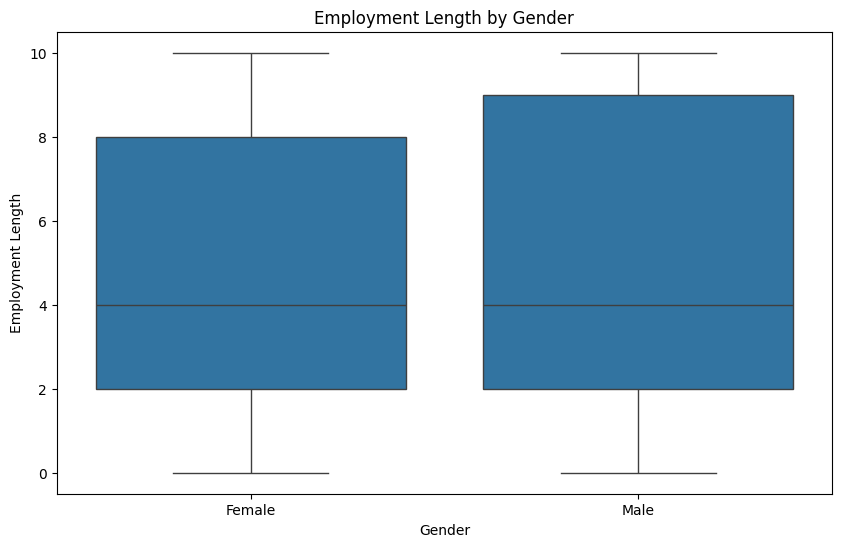

In [29]:
# Create a box plot for employment length
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='emp_length', data=df)
plt.title('Employment Length by Gender')
plt.xlabel('Gender')
plt.ylabel('Employment Length')
plt.show()

In [30]:
# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['home_ownership'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and home ownership.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between gender and home ownership.")

Chi-Square Test p-value: 0.7519476382276207
Fail to reject the null hypothesis: There is no significant association between gender and home ownership.


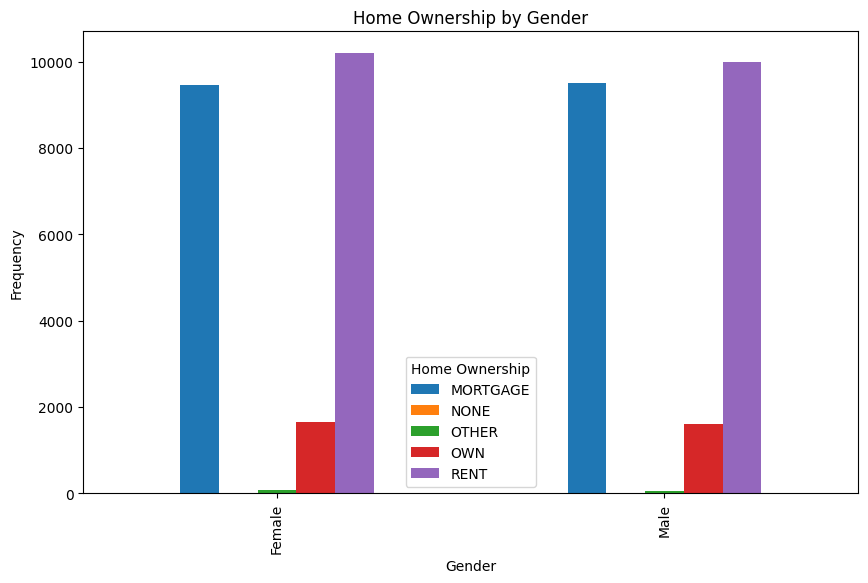

In [31]:
# Create a bar plot for home ownership
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Home Ownership by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(title='Home Ownership')
plt.show()

C:\Users\unnat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21162.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\unnat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21373.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for males: p-value = 2.2317963422165492e-122
Shapiro-Wilk Test for females: p-value = 1.8066248439888864e-119


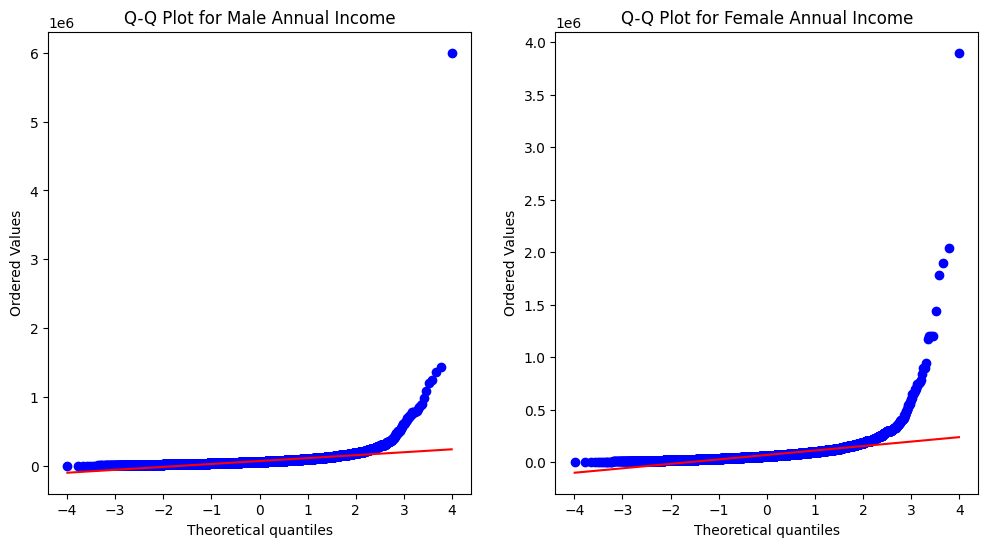

In [32]:
# Separate data by gender
male_data = df[df['gender'] == 'Male']['annual_inc']
female_data = df[df['gender'] == 'Female']['annual_inc']

# Shapiro-Wilk Test for normality
shapiro_male = stats.shapiro(male_data)
shapiro_female = stats.shapiro(female_data)

print(f"Shapiro-Wilk Test for males: p-value = {shapiro_male.pvalue}")
print(f"Shapiro-Wilk Test for females: p-value = {shapiro_female.pvalue}")

# Q-Q Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for male data
stats.probplot(male_data, dist="norm", plot=axs[0])
axs[0].set_title("Q-Q Plot for Male Annual Income")

# Q-Q plot for female data
stats.probplot(female_data, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot for Female Annual Income")

plt.show()

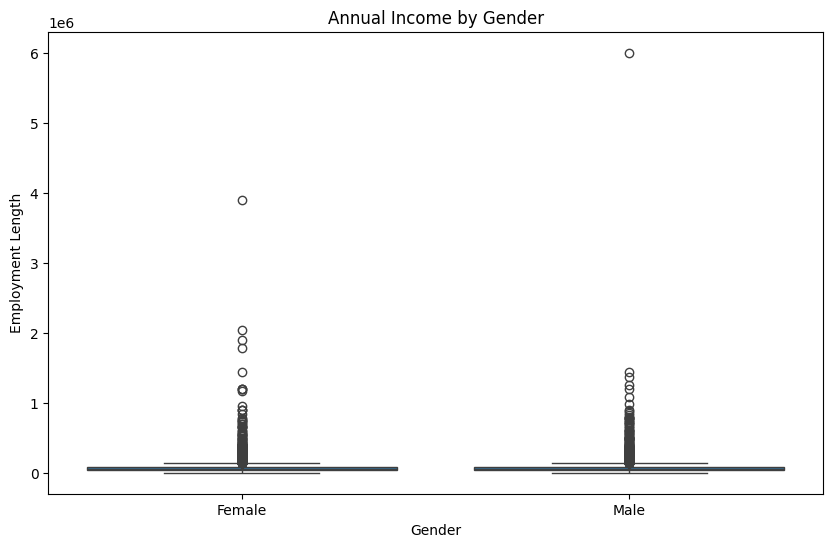

In [33]:
# Create a box plot for employment length
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='annual_inc', data=df)
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Employment Length')
plt.show()

In [34]:
male_data.sort_values(ascending=False)

13549    6000000.0
9759     1440000.0
9474     1362000.0
41633    1250000.0
18986    1200000.0
           ...    
34315       4000.0
37154       3600.0
4643        3300.0
36905       2000.0
3681        1896.0
Name: annual_inc, Length: 21162, dtype: float64

In [35]:
female_data.sort_values(ascending=False)

13965    3900000.0
4491     2039784.0
19560    1900000.0
33759    1782000.0
12806    1440000.0
           ...    
14018       4800.0
4098        4500.0
36076       4000.0
8346        4000.0
4168        3500.0
Name: annual_inc, Length: 21373, dtype: float64

In [36]:
np.median(male_data), np.median(female_data)

(59000.0, 58179.0)

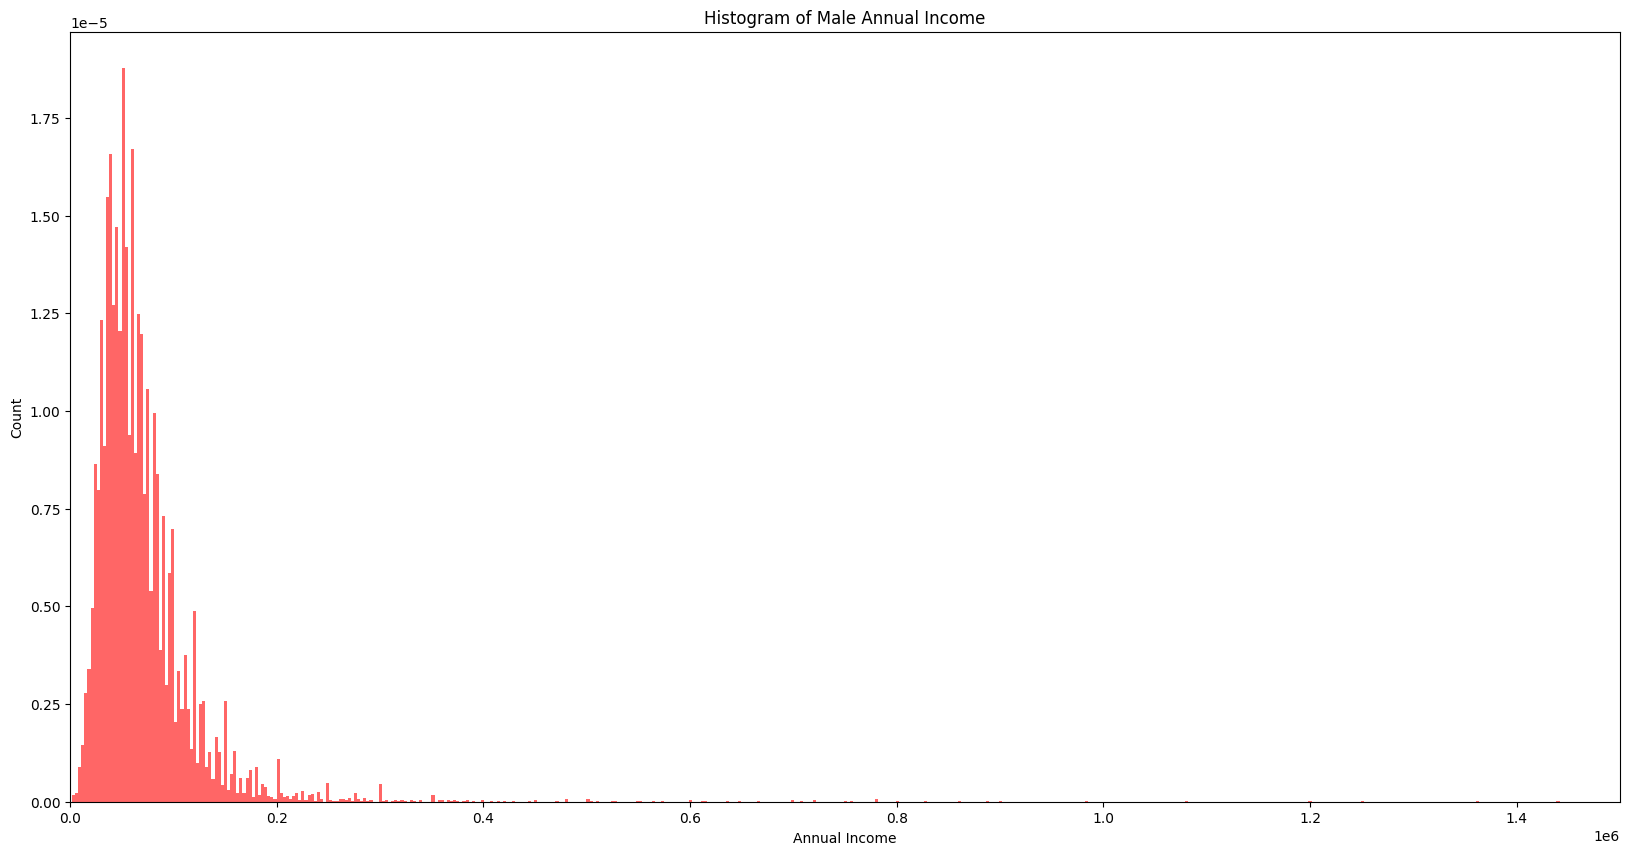

In [37]:
# Plot histogram
plt.figure(figsize=(20, 10))

plt.hist(male_data, bins=2000, density=True, alpha=0.6, color='r')
plt.title('Histogram of Male Annual Income')
plt.xlim(0,1.5*1e6)
plt.xlabel('Annual Income')
plt.ylabel('Count')

# Show the plot
plt.show()

In [47]:
from scipy.stats import norm

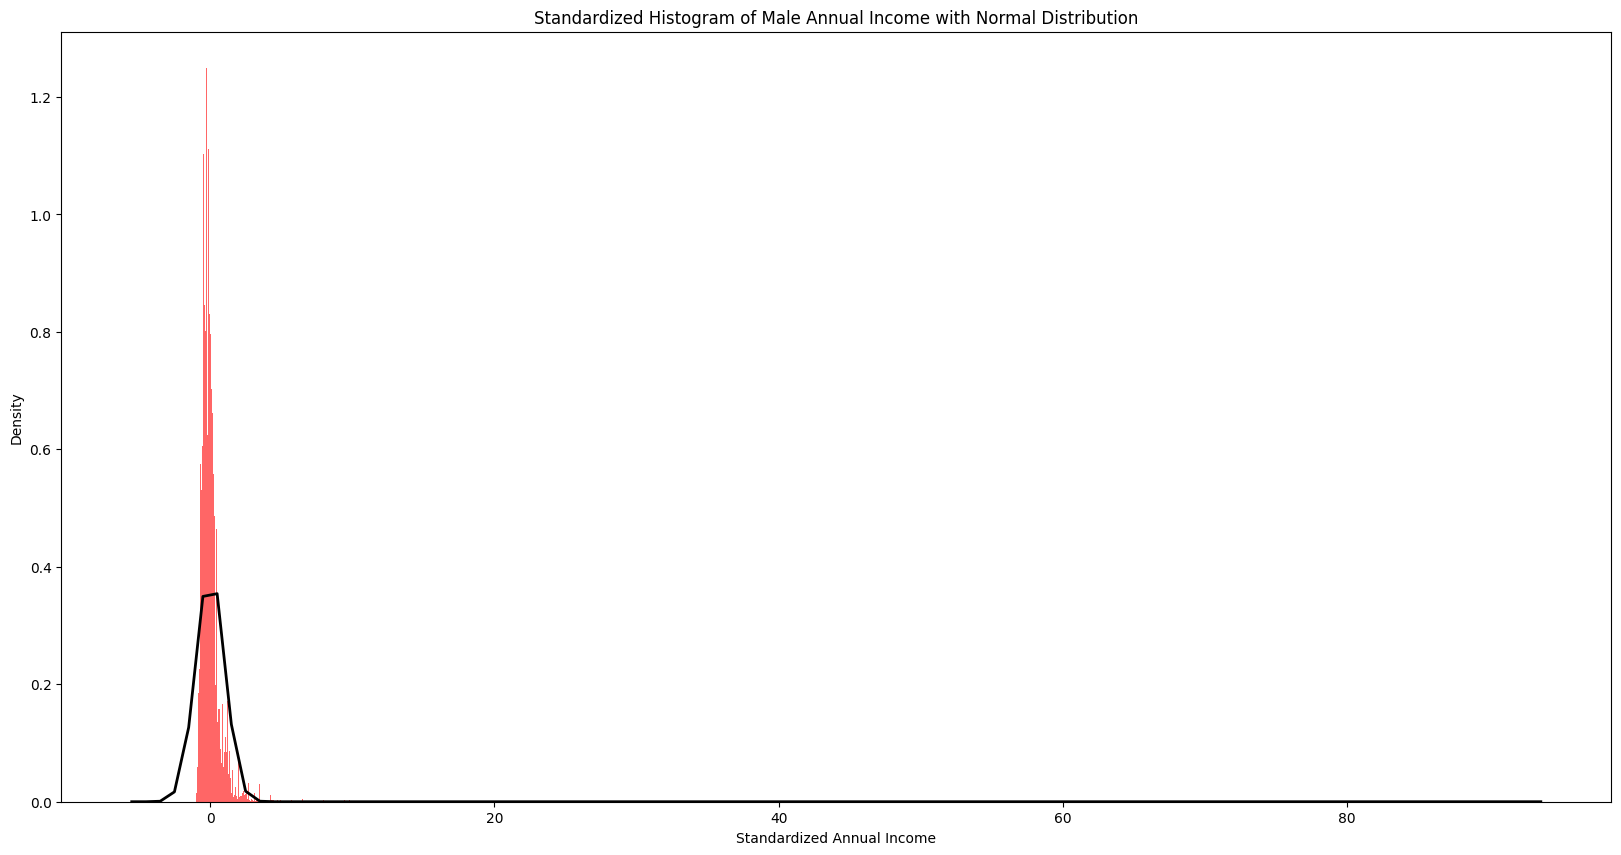

In [48]:
# Standardize the data
mean = np.mean(male_data)
std_dev = np.std(male_data)
standardized_data = (male_data - mean) / std_dev

# Create a histogram of the standardized data
plt.figure(figsize=(20, 10))
plt.hist(standardized_data, bins=2000, density=True, alpha=0.6, color='r')

# Plot the normal distribution for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)

# Add title and labels
plt.title('Standardized Histogram of Male Annual Income with Normal Distribution')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Density')

# Show the plot
plt.show()

In [49]:
# Verify the mean and variance of the standardized data
print("Mean of standardized data:", np.mean(standardized_data))
print("Variance of standardized data:", np.var(standardized_data))

Mean of standardized data: -7.78971338703068e-17
Variance of standardized data: 1.0


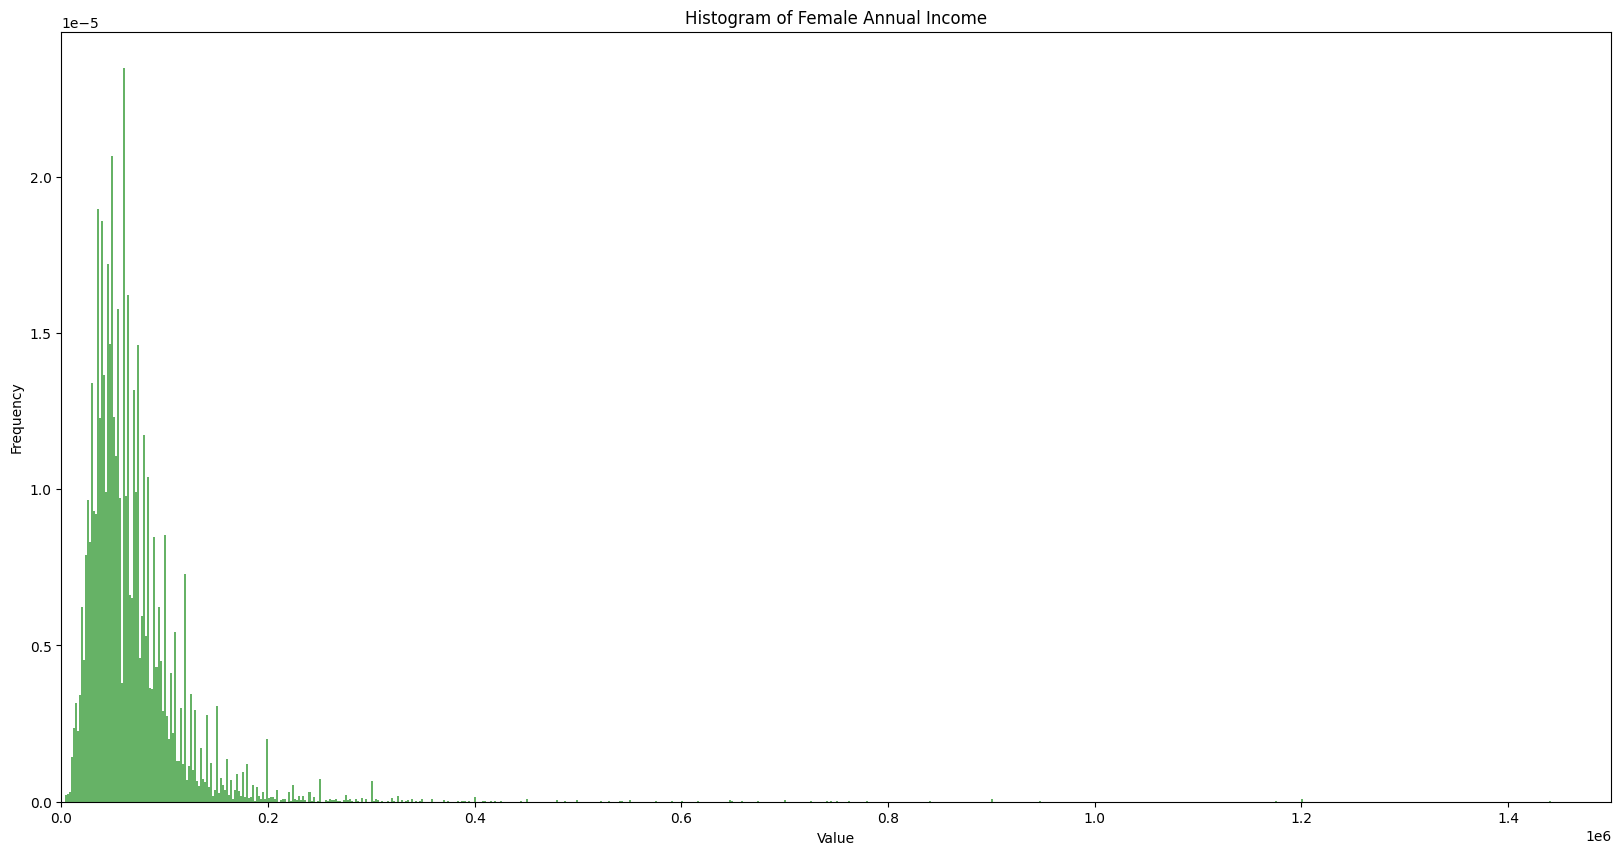

In [38]:
# Plot histogram
plt.figure(figsize=(20, 10))

plt.hist(female_data, bins=2000, density=True, alpha=0.6, color='g')
plt.xlim(0,1.5*1e6)
plt.title('Histogram of Female Annual Income')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [39]:
df = df.drop(['emp_title', 'title', 'desc', 'loan_status', 'collections_12_mths_ex_med', 'id', 'member_id'], axis=1)

In [40]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

continuous_columns = continuous_columns.to_list()

# continuous_columns.remove('loan_status')
# continuous_columns.remove('id')
# continuous_columns.remove('member_id')

In [41]:
categorical_columns, continuous_columns

(Index(['term', 'home_ownership', 'verification_status', 'issue_d',
        'pymnt_plan', 'purpose', 'addr_state', 'race_name', 'gender'],
       dtype='object'),
 ['loan_amnt',
  'funded_amnt',
  'funded_amnt_inv',
  'installment',
  'emp_length',
  'annual_inc',
  'dti',
  'delinq_2yrs',
  'inq_last_6mths',
  'mths_since_last_delinq',
  'mths_since_last_record',
  'open_acc',
  'pub_rec',
  'revol_bal',
  'total_acc',
  'out_prncp',
  'out_prncp_inv',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_prncp',
  'total_rec_int',
  'total_rec_late_fee',
  'recoveries',
  'collection_recovery_fee',
  'pub_rec_bankruptcies',
  'interest_rate',
  'revol_utilization',
  'number_bc_gt_75',
  'fico_score',
  'lti',
  'month_since_oldest_tl'])

In [42]:
for col in categorical_columns:
    one_hot_encoded = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, one_hot_encoded.astype(int)], axis=1)

    df = df.drop(columns=[col])

In [43]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,race_name_African American,race_name_Asian,race_name_Other,race_name_White,gender_Female,gender_Male
0,5150,5150,5150.0,132.58,1.0,34992.0,17.59,0.0,3.0,600.0,...,0,0,0,0,0,0,0,1,1,0
1,20000,20000,20000.0,635.07,6.0,72000.0,7.80,0.0,2.0,600.0,...,0,0,0,0,1,0,0,0,1,0
2,12800,12800,12750.0,316.54,9.0,81708.0,14.22,1.0,1.0,15.0,...,0,0,0,0,0,0,0,1,1,0
3,14000,14000,14000.0,349.98,9.0,72000.0,20.35,0.0,1.0,600.0,...,0,0,0,0,0,0,0,1,1,0
4,15000,15000,14975.0,370.94,0.0,72000.0,20.50,0.0,0.0,600.0,...,0,0,0,0,0,0,0,1,1,0


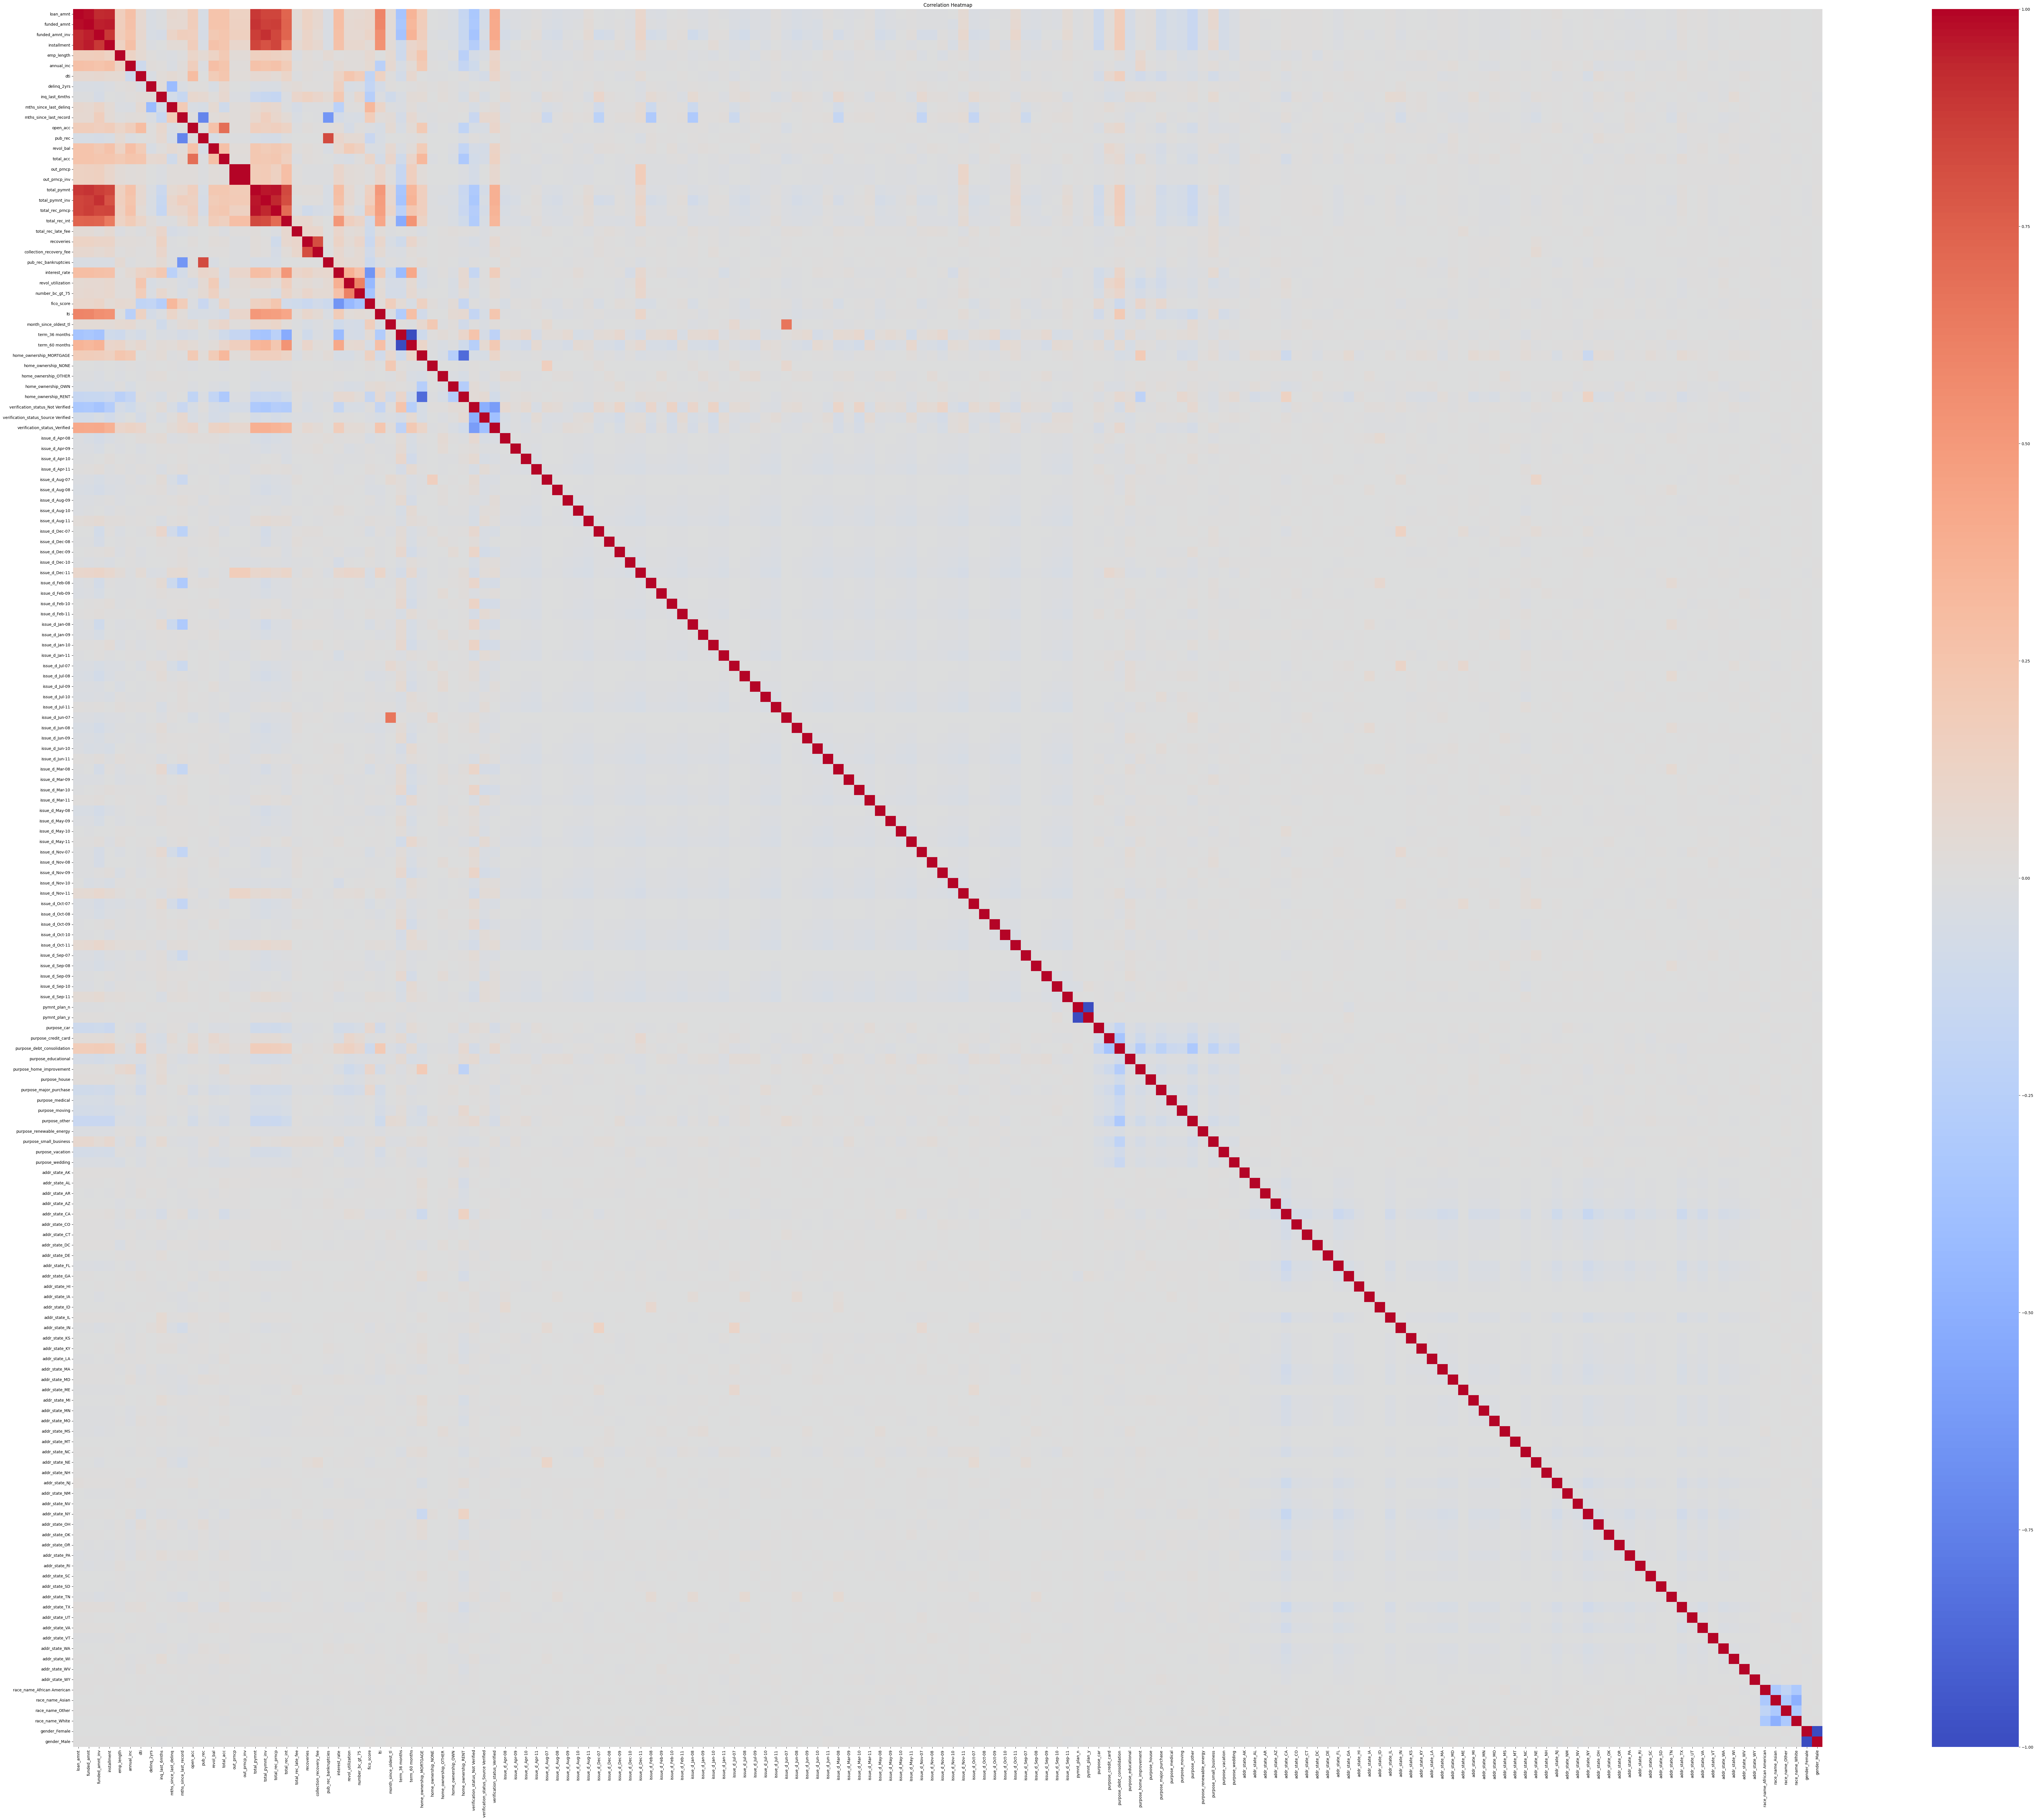

In [44]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [45]:
# output_columns = df[['funded_amnt', 'funded_amnt_inv', 'issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv',
#                      'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
#                      'collection_recovery_fee', 'interest_rate']]

# # Calculate the correlation matrix
# correlation_matrix = df.drop(output_columns, axis=1).corr()

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap')
# plt.show()

In [46]:
# df.drop(output_columns, axis=1)